# TOPIC : HOUSE_PRICE_PREDICTION

# BY : SRISHTI SHARMA

# IMPORTING LIBRARIES 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
house_price = pd.read_csv("housing.csv")       

In [3]:
house_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
house_price.shape

(545, 13)

In [6]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
house_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


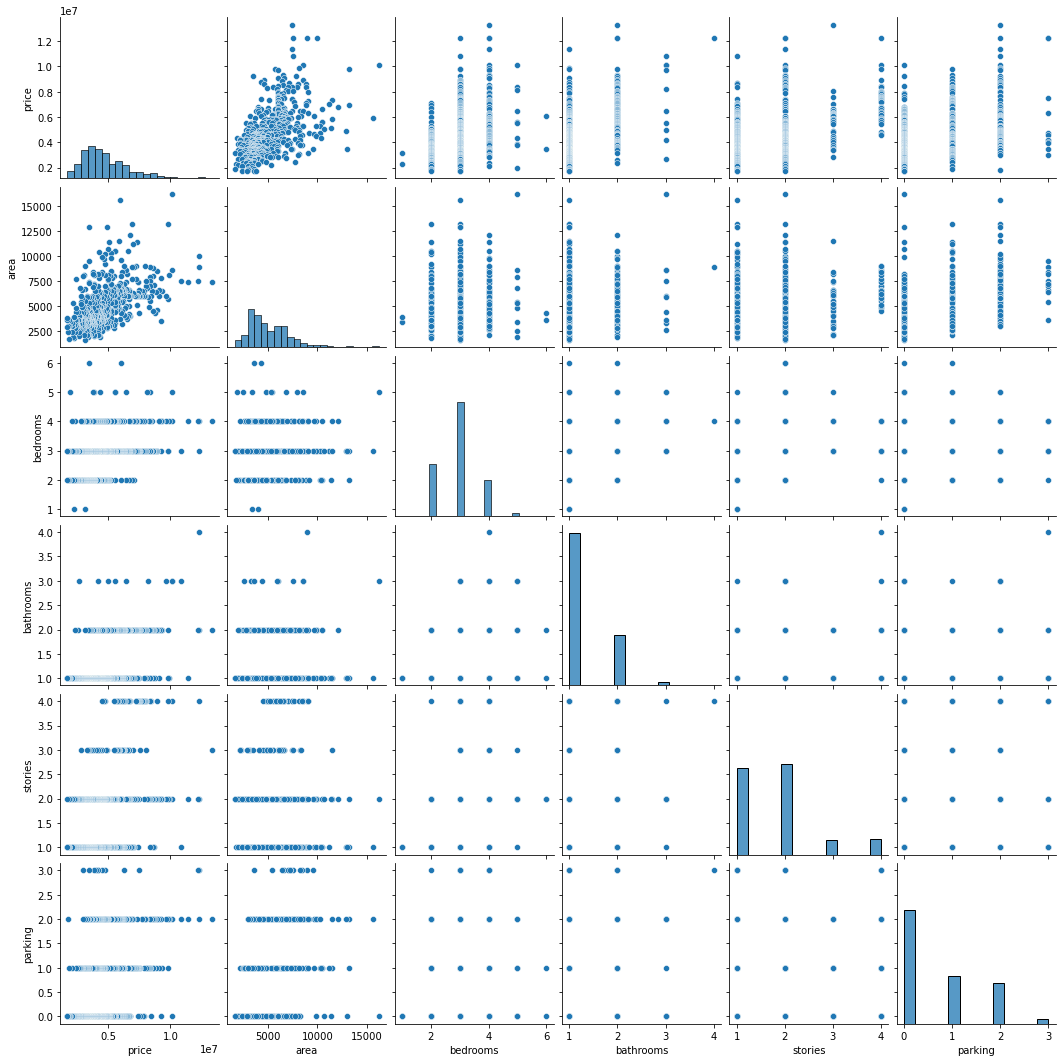

In [8]:
sns.pairplot(house_price)                        # VISUALISING NUMERIC VARIABLES

<AxesSubplot:xlabel='price', ylabel='Density'>

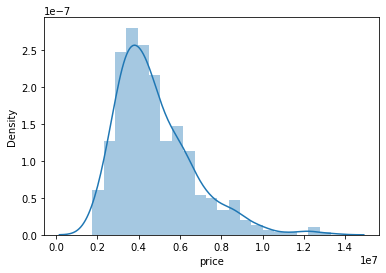

In [9]:
sns.distplot(house_price['price'])

<AxesSubplot:>

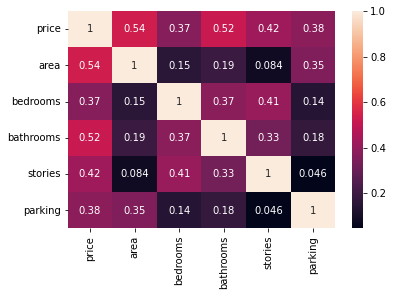

In [10]:
sns.heatmap(house_price.corr(),annot=True)

In [11]:
house_price.isnull().sum()*100/house_price.shape[0]         # CHECKING FOR NULL VALUES

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

# OUTLIER ANALYSIS

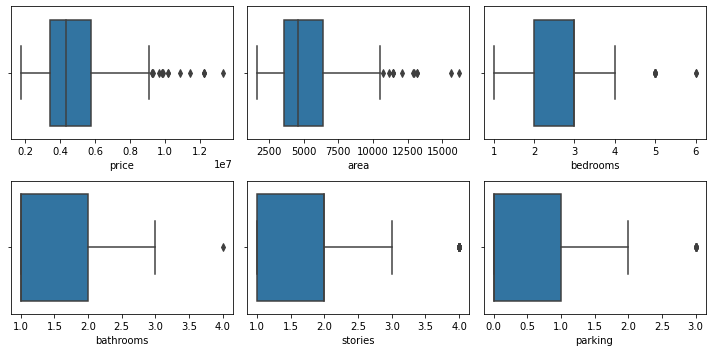

In [12]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(house_price['price'], ax = axs[0,0])
plt2 = sns.boxplot(house_price['area'], ax = axs[0,1])
plt3 = sns.boxplot(house_price['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(house_price['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(house_price['stories'], ax = axs[1,1])
plt3 = sns.boxplot(house_price['parking'], ax = axs[1,2])

plt.tight_layout()

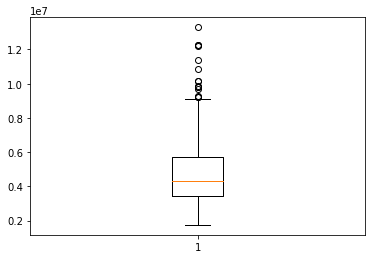

In [13]:
plt.boxplot(house_price.price)                    # OUTLIER TREATMENT FOR PRICE
Q1 = house_price.price.quantile(0.25)
Q3 = house_price.price.quantile(0.75)
IQR = Q3 - Q1
house_price = house_price[(house_price.price >= Q1 - 1.5*IQR) & (house_price.price <= Q3 + 1.5*IQR)]

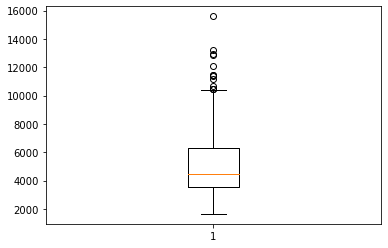

In [14]:
plt.boxplot(house_price.area)                                 # OUTLIER TREATMENT FOR AREA
Q1 = house_price.area.quantile(0.25)
Q3 = house_price.area.quantile(0.75)
IQR = Q3 - Q1
house_price = house_price[(house_price.area >= Q1 - 1.5*IQR) & (house_price.area <= Q3 + 1.5*IQR)]

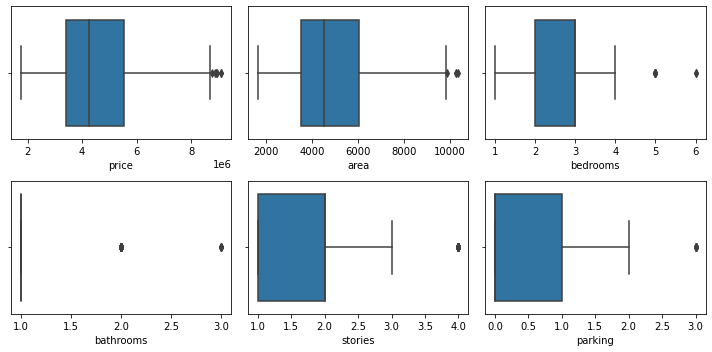

In [15]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(house_price['price'], ax = axs[0,0])
plt2 = sns.boxplot(house_price['area'], ax = axs[0,1])
plt3 = sns.boxplot(house_price['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(house_price['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(house_price['stories'], ax = axs[1,1])
plt3 = sns.boxplot(house_price['parking'], ax = axs[1,2])

plt.tight_layout()


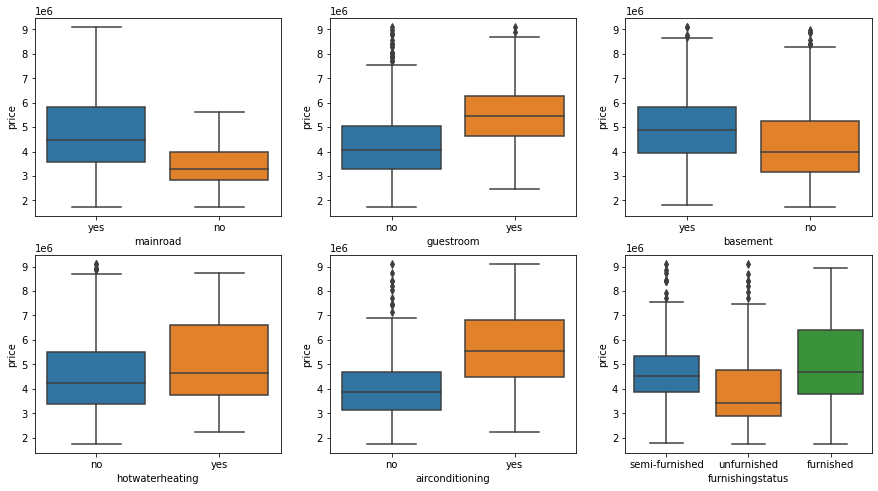

In [16]:
plt.figure(figsize=(15, 8))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = house_price)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = house_price)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = house_price)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = house_price)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = house_price)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = house_price)
plt.show()

In [17]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
house_price[varlist] = house_price[varlist].apply(binary_map)


In [18]:
house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [19]:
status = pd.get_dummies(house_price['furnishingstatus'])                # DUMMY VARIABLES

In [20]:
status.head()


,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [21]:
status = pd.get_dummies(house_price['furnishingstatus'], drop_first = True)

In [22]:
house_price = pd.concat([house_price, status], axis = 1)

In [23]:
house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [24]:
house_price.drop(['furnishingstatus'], axis = 1, inplace = True)

In [25]:
house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [26]:
X = house_price[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',           # X AND y LIST
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished']]
y = house_price['price']

# SPLITING DATA INTO TRAIN AND TEST

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=101)

# LINEAR REGRESSION MODEL

In [28]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [29]:
print(lm.intercept_)

272262.67477397155


In [30]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

                   Coefficient
area                264.805937
bedrooms         114926.898544
bathrooms        678512.894773
stories          406144.569119
mainroad         548294.824694
guestroom        496735.409062
basement         393330.449606
hotwaterheating  777311.602559
airconditioning  814789.263990
parking          134007.640267
prefarea         472531.881198
semi-furnished    29159.135639
unfurnished     -340386.948210


In [31]:
predictions = lm.predict(X_test)

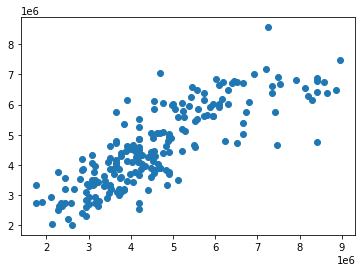

In [32]:
plt.scatter(y_test,predictions)

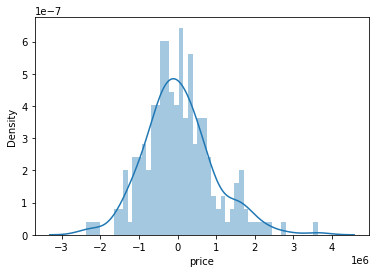

In [33]:
sns.distplot((y_test-predictions),bins=50);            # bell shaped (normal distributionZ)

# REGRESSION EVALUATION METRICS


In [34]:
from sklearn import metrics 

print('MAE:',metrics.mean_absolute_error(y_test,predictions))              #--Mean Absolute Error
print('MSE:',metrics.mean_squared_error(y_test,predictions))               #--Mean Squared Error
print('RSME:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))     # --Root Mean Squared Error

MAE: 681683.9242972201
MSE: 817185156937.7035
RSME: 903982.9406231644
